In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


I this post we're going to explore Walmart dataset and try to answer a few questions about it. 

We're working with Walmart's sales data from 2011 to 2016 in 3 tables.

- `calendar.csv` - a calendar for the period of the dataset. contains the events.
- `sales_train_validation.csv`  historical daily unit sales, per product and store
- `sell_prices.csv` - a weekly mean of the prices of the products sold in stores

Let's start by imports and loading the sales_train_validation.csv , sell_prices.csv,and calendar.csv

In [56]:
sales = pd.read_csv("dataset/sales_train_validation.csv")
price = pd.read_csv("dataset/sell_prices.csv")
calendar = pd.read_csv("dataset/calendar.csv")

In [57]:
# sales = sales.sample(100)
display(sales.sample(5))
display(calendar.sample(5))
display(price.sample(5))

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
28484,HOUSEHOLD_1_488_WI_3_validation,HOUSEHOLD_1_488,HOUSEHOLD_1,HOUSEHOLD,WI_3,WI,6,7,7,6,...,0,0,0,0,0,0,0,0,0,0
11071,FOODS_2_097_CA_4_validation,FOODS_2_097,FOODS_2,FOODS,CA_4,CA,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
25295,HOUSEHOLD_1_345_WI_2_validation,HOUSEHOLD_1_345,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,2,0,0,0,...,0,0,1,0,0,0,0,0,1,0
12287,HOBBIES_1_094_TX_1_validation,HOBBIES_1_094,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,0,2,0,0,0,0,1,0,1
5152,FOODS_2_277_CA_2_validation,FOODS_2_277,FOODS_2,FOODS,CA_2,CA,0,0,0,0,...,2,2,0,2,0,0,1,0,1,2


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1943,2016-05-25,11617,Wednesday,5,5,2016,d_1944,NaN,NaN,NaN,NaN,0,0,0
878,2013-06-25,11322,Tuesday,4,6,2013,d_879,NaN,NaN,NaN,NaN,0,0,0
511,2012-06-23,11222,Saturday,1,6,2012,d_512,NaN,NaN,NaN,NaN,0,0,0
812,2013-04-20,11313,Saturday,1,4,2013,d_813,NaN,NaN,NaN,NaN,0,0,0
834,2013-05-12,11316,Sunday,2,5,2013,d_835,Mother's day,Cultural,NaN,NaN,0,1,1


,store_id,item_id,wm_yr_wk,sell_price
4985656,WI_1,HOUSEHOLD_1_259,11237,10.97
1557384,CA_3,HOUSEHOLD_1_440,11422,13.97
2234976,CA_4,HOUSEHOLD_1_396,11548,3.97
6805671,WI_3,FOODS_3_668,11243,1.58
5007970,WI_1,HOUSEHOLD_1_364,11423,7.86


In [58]:
catgs = sales["cat_id"].unique().tolist()
catgs

['HOBBIES', 'HOUSEHOLD', 'FOODS']

# Question1
## 1. Sales trend comparison between states

In [59]:
states = ["WI","CA","TX"]
total_sales = pd.DataFrame()
for state in states:
    total_sales[state] = sales[sales["state_id"]==state].sum(axis=0)
    
total_sales.drop(total_sales.index[range(0,6)],axis=0,inplace=True)

In [60]:
total_sales = pd.merge(total_sales,calendar.set_index("d")[["date"]],left_index=True,right_index=True,how="left")
total_sales.set_index("date",inplace=True)

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

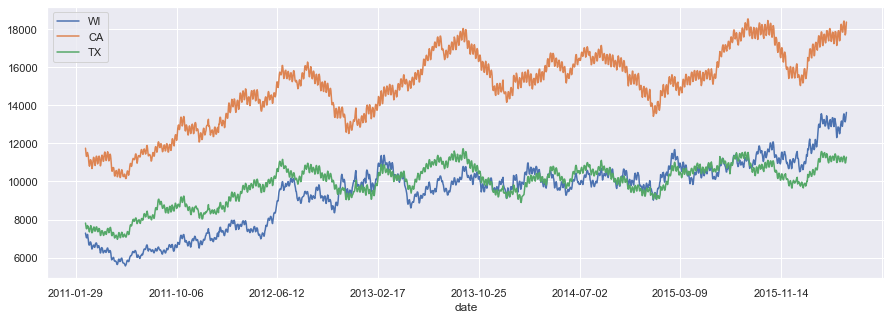

In [61]:
sns.set()
fig, ax = plt.subplots(figsize=(15,5))
total_sales.select_dtypes(object).astype(int)
total_sales_ma = total_sales.apply(lambda col:col.rolling(25).mean(),axis=0)
total_sales_ma.plot(kind="line", ax=ax)

California sells more in total. Wisconsin and Texas are more stable than California. Seems like Wisconsin has been on the verge of surpassing Texas for a while, and it finally does. Now we should investigate the trend by looking into the sales trends per store in each state.

# Question 2
## 2. The sales trend comparison for stores in all states
groupby the sales data by state_id and store_id, and then transpose it. This gives us multilevel columns which we should get rid of. It makes things simpler.


In [62]:
sales_st_store = sales.groupby(["state_id","store_id"]).sum().loc[:,"d_1":]
sales_st_store = sales_st_store.T
sales_st_store.columns = sales_st_store.columns.get_level_values(1)

In [65]:
states = sales["state_id"].unique().tolist()
stores = sales["store_id"].unique().tolist()
sales_st_store.head(5)

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
d_1,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038
d_2,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198
d_3,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317
d_4,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211
d_5,2630,1942,3817,1536,1694,2492,1726,2,1175,2132


/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


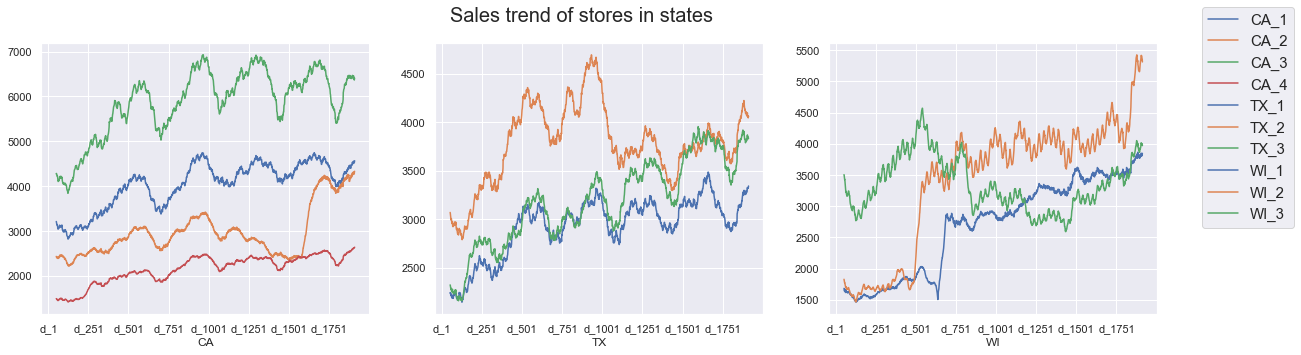

In [68]:

fig, axes  = plt.subplots(1,3,figsize=(20,5))
fig.suptitle("Sales trend of stores in states",fontsize=20)
for i, state in enumerate(states):
    ax = axes[i]
    ax.set_xlabel(state)
    for col in sales_st_store.columns:
        if state in col:
            sales_st_store[col].rolling(50).mean().plot(kind="line",ax=ax)
            
fig.legend(sales_st_store.columns.tolist(),fontsize=15)


# Question 3

## 3. Sales trend comparison within the categories of products
 We need to find all the categories and then calculate the daily sales for each category over days.

In [69]:
catgs = sales["cat_id"].unique().tolist()

In [75]:
days = sales.columns.values[6:]
hist_sales = pd.DataFrame()
for cat in catgs:
    cat_df = sales[sales["cat_id"]==cat]
    for day in days:
        hist_sales.loc[day,cat] = cat_df[day].sum() 
    
hist_sales.head()

,HOBBIES,HOUSEHOLD,FOODS
d_1,3764.0,5689.0,23178.0
d_2,3357.0,5634.0,22758.0
d_3,2682.0,3927.0,17174.0
d_4,2669.0,3865.0,18878.0
d_5,1814.0,2729.0,14603.0


In [76]:
hist_sales = pd.merge(hist_sales,calendar.set_index("d")[["date"]],
                                            left_index=True,right_index=True,how="left")
hist_sales.set_index("date",inplace=True)

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

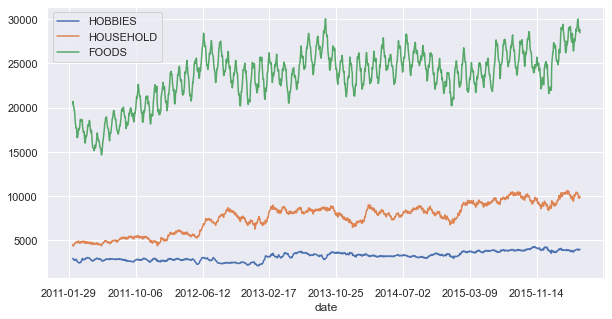

In [79]:
sns.set()
fig, ax = plt.subplots(figsize=(10,5))
hist_sales.select_dtypes(object).astype(int)
hist_sales_ma = hist_sales.apply(lambda col:col.rolling(15).mean(),axis=0)
# hist_sales_ma.index = hist_sales_ma.index.str.split("_").str[1]

hist_sales_ma.plot(kind="line", ax=ax)

Foods category is generating most of the sales. it also has a seasonal trend which we obviously don't see in Household and Hobbies.

# Question4
## 4. Sales trend of different categories in each state

In [80]:
sales_cat_st = sales.groupby(["state_id","cat_id"]).sum().T.loc["d_1":,:]

In [81]:
sales_cat_st.columns = ["_".join(c) for c in sales_cat_st.columns]

In [83]:
sales_cat_st.head(5)

,CA_FOODS,CA_HOBBIES,CA_HOUSEHOLD,TX_FOODS,TX_HOBBIES,TX_HOUSEHOLD,WI_FOODS,WI_HOBBIES,WI_HOUSEHOLD
d_1,10101,1802,2292,6853,879,1706,6224,1083,1691
d_2,9862,1561,2382,7030,870,1730,5866,926,1522
d_3,6944,1472,1692,5124,526,1128,5106,684,1107
d_4,7864,1405,1778,5470,809,1102,5544,455,985
d_5,7178,1181,1566,4602,501,809,2823,132,354


/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/usr/local/lib/python3.8/site-packages/pandas/plot

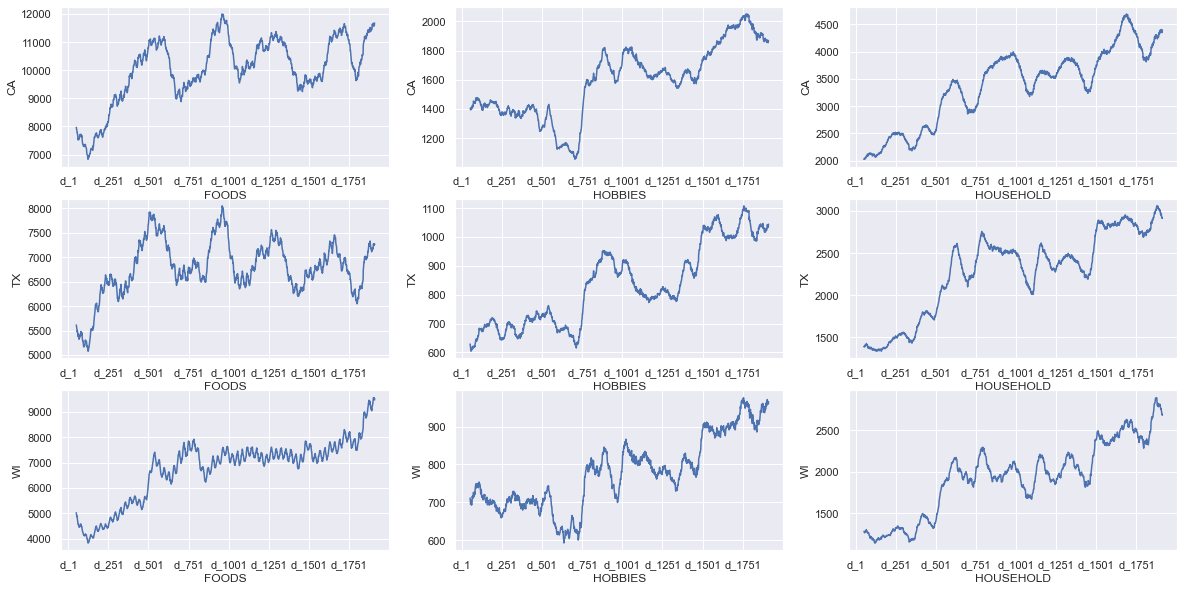

In [84]:
fig, axes  = plt.subplots(3,3,figsize=(20,10))

for i,state in enumerate(states):
    for j, col in enumerate(sales_cat_st.columns):
        if state in col:
            ax= axes[i][j%3]
            ax.set_ylabel(state)
            ax.set_xlabel(col.split("_")[1] )
            sales_cat_st[col].rolling(50).mean().plot(ax=ax)
        


# Quetion 5
## 5. Total sales of walmart over days of the week and months of the year

In [85]:
days = calendar.set_index("d")
days.head()

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
d,,,,,,,,,,,,,
d_1,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_2,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_3,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_4,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
d_5,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [86]:
days_sales = pd.DataFrame()
days_sales["sales"] = sales.sum()
days_sales = days_sales.loc["d_1":,:]

In [87]:
year_sales = pd.DataFrame()
year_sales= pd.merge(days_sales,days[["weekday","month"]],right_index=True,left_index=True)
year_sales

,sales,weekday,month
d_1,32631,Saturday,1
d_2,31749,Sunday,1
d_3,23783,Monday,1
d_4,25412,Tuesday,2
d_5,19146,Wednesday,2
...,...,...,...
d_1909,35343,Wednesday,4
d_1910,35033,Thursday,4
d_1911,40517,Friday,4
d_1912,48962,Saturday,4


In [88]:
week_month = year_sales.groupby(["month","weekday"]).agg({"sales": "sum"}).unstack("weekday")


week_month

monthDict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
            7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
week_month.index = map(lambda m: monthDict[m],week_month.index.values)
week_month.columns = week_month.columns.get_level_values(1)
week_month = week_month.T
week_month.index = pd.Categorical(week_month.index,categories=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
                                  ordered=True)
week_month.sort_index()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Monday,699629,823590,845361,791815,667727,754775,733643,748332,765193,718843,666887,753065
Tuesday,628697,722176,807303,761470,635392,661240,739307,658649,688428,673914,624137,689964
Wednesday,629219,749709,763004,747955,628255,637255,736361,682468,640696,691833,633310,652671
Thursday,675517,734972,806011,718085,667089,643164,722279,698013,639712,700701,578785,661639
Friday,785297,805166,875930,856296,763838,746289,800855,836389,729346,769570,705891,668827
Saturday,997833,1041717,1136936,1044592,859250,902349,826864,984441,905580,936699,880504,867084
Sunday,929319,1012259,1152665,1040798,816546,905140,884666,963438,952934,889029,904110,818722


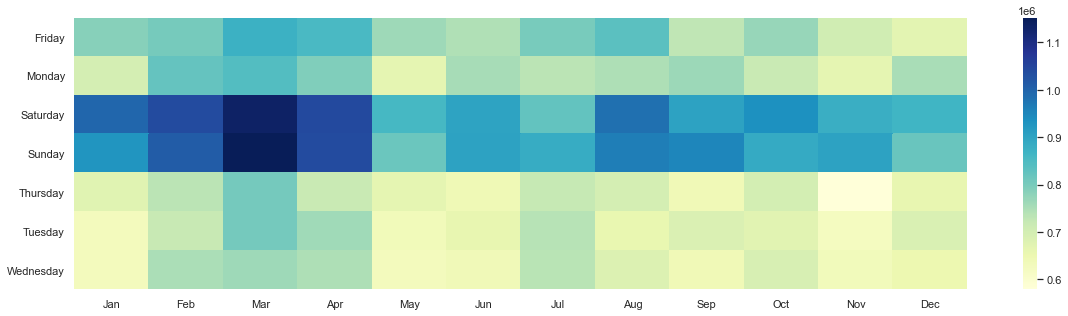

In [73]:
plt.subplots(figsize=(20,5))
sns.heatmap(week_month, annot=False, cmap="YlGnBu")

# Question 6
## 6. Aggregate sales of categories, monthly comparison and all time trend

In [117]:
cat_sales = sales.groupby(["cat_id"]).sum().T.loc["d_1":,:]
cat_sales  = pd.merge(cat_sales,days[["month"]],right_index=True,left_index=True)
cat_sales[cat_sales.select_dtypes(object).columns] = cat_sales.select_dtypes(object).astype(int)

cat_sum_sales_monthly = cat_sales.groupby(["month"]).sum()
cat_median_sales_monthly = cat_sales.groupby(["month"]).agg({
    "FOODS":"median",
    "HOBBIES":"median",
    "HOUSEHOLD":"median",
})

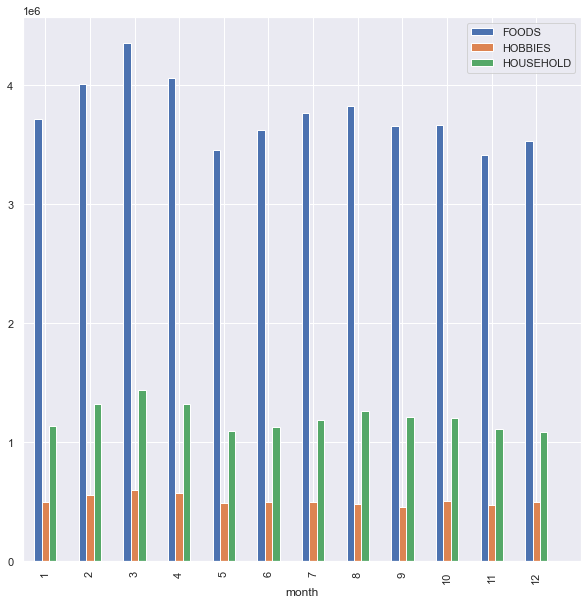

In [118]:
fig , ax = plt.subplots(1,figsize=(10,10))
cat_sum_sales_monthly.plot(kind="bar",ax=ax)
_ = ax.set_xticks(range(0,13))

In [119]:
cat_sales = pd.merge(cat_sales,calendar.set_index("d")[["date"]],left_index=True,right_index=True,how="left")
cat_sales.set_index("date",inplace=True)

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


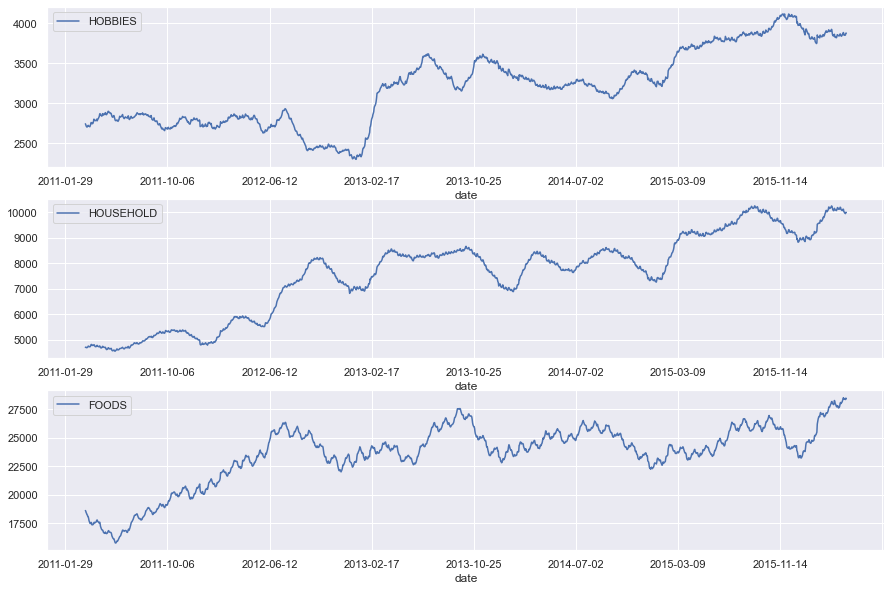

In [134]:
fig , axes = plt.subplots(3,1,figsize=(15,10))
for i,cat in enumerate(catgs):
    ax = axes[i]
    ax.set_xlabel(cat)
    cat_sales[cat].rolling(50).mean().plot(ax=ax,kind="line",label=cat)
    ax.legend([cat])

# Question 7 
## Distribution of yearly mean item prices in different categories 

In [136]:
price_year = pd.merge(price,calendar[["wm_yr_wk","year"]],on="wm_yr_wk",how="left")
price_year

,store_id,item_id,wm_yr_wk,sell_price,year
0,CA_1,HOBBIES_1_001,11325,9.58,2013
1,CA_1,HOBBIES_1_001,11325,9.58,2013
2,CA_1,HOBBIES_1_001,11325,9.58,2013
3,CA_1,HOBBIES_1_001,11325,9.58,2013
4,CA_1,HOBBIES_1_001,11325,9.58,2013
...,...,...,...,...,...
47735392,WI_3,FOODS_3_827,11620,1.00,2016
47735393,WI_3,FOODS_3_827,11620,1.00,2016
47735394,WI_3,FOODS_3_827,11620,1.00,2016
47735395,WI_3,FOODS_3_827,11621,1.00,2016


In [137]:
price_year_mean = price_year.groupby(["item_id","year"]).mean()
price_year_mean

wm_yr_wk  sell_price
item_id         year                          
FOODS_1_001     2011  11124.621766    1.998959
                2012  11219.245902    2.074683
                2013  11319.712329    2.236055
                2014  11418.150685    2.235104
                2015  11518.339726    2.240000
...                            ...         ...
HOUSEHOLD_2_516 2012  11219.245902    5.930552
                2013  11319.712329    5.940000
                2014  11418.150685    5.940000
                2015  11518.339726    5.940000
                2016  11600.432749    5.919737

[15971 rows x 2 columns]

In [138]:
price_year_mean = price_year_mean.drop("wm_yr_wk",axis=1)
price_year_mean.reset_index(1,inplace=True)
price_year_mean
price_dept = pd.merge(price_year_mean,sales.set_index("item_id")[["dept_id","store_id","state_id"]],on="item_id",how="left")

,year,sell_price
item_id,,
FOODS_1_001,2011,1.998959
FOODS_1_001,2012,2.074683
FOODS_1_001,2013,2.236055
FOODS_1_001,2014,2.235104
FOODS_1_001,2015,2.240000
...,...,...
HOUSEHOLD_2_516,2012,5.930552
HOUSEHOLD_2_516,2013,5.940000
HOUSEHOLD_2_516,2014,5.940000


In [141]:
price_dept = pd.merge(price_year_mean,sales.set_index("item_id")[["dept_id","store_id","state_id"]],on="item_id",how="left")

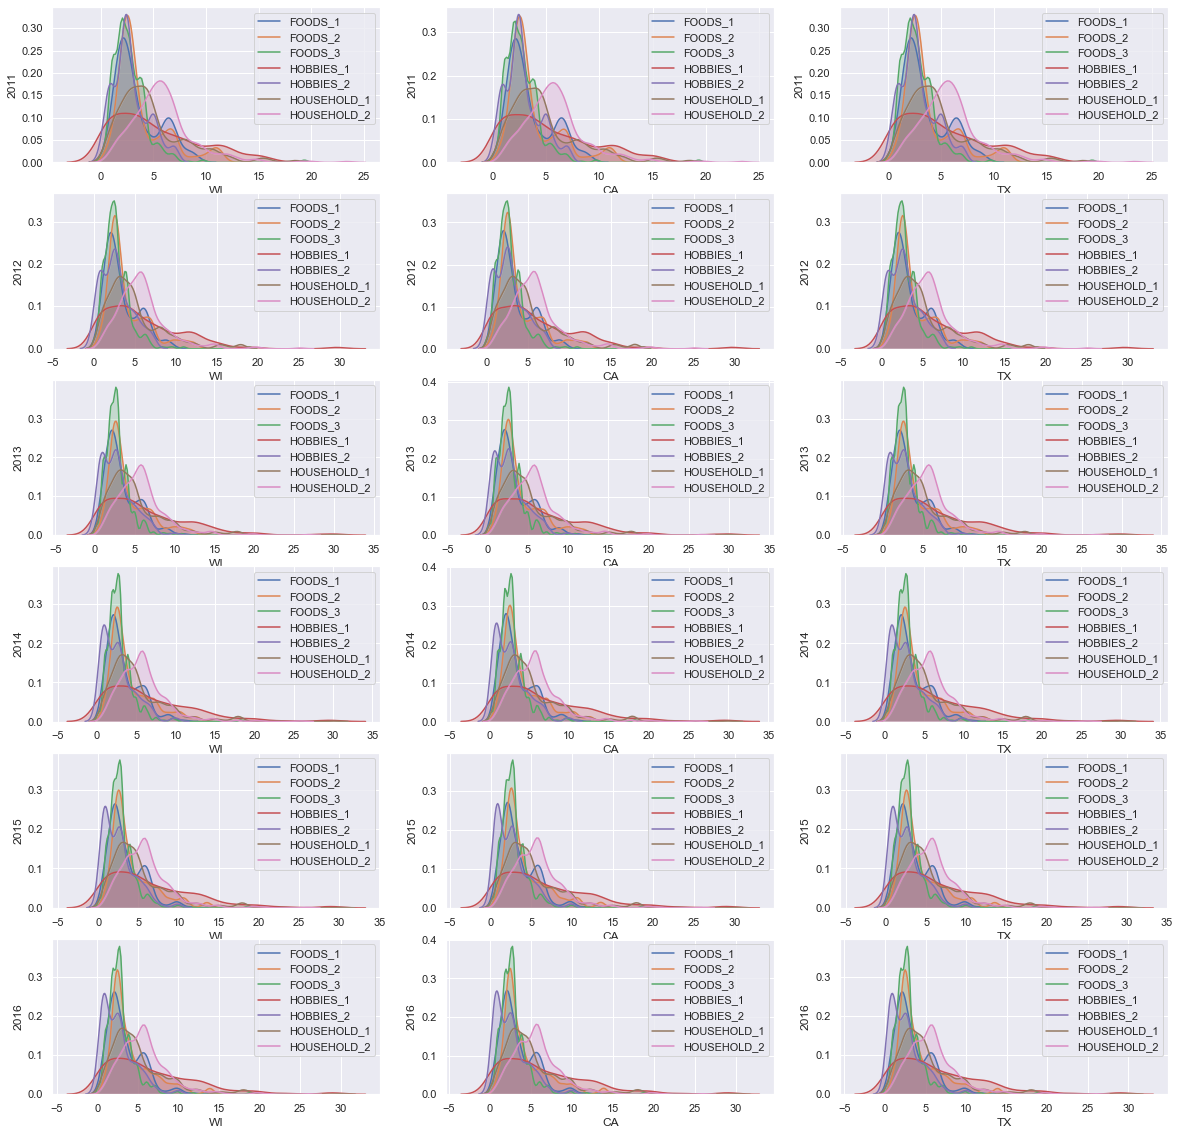

In [152]:
states = ["WI","CA","TX"]
fig , axes = plt.subplots(6,3)
           
fig.set_size_inches(20,20)
for y,year in enumerate(price_dept["year"].unique().tolist()):
    for i,state in enumerate(states):
        ax = axes[y%6][i]
        state_dept = price_dept[(price_dept["state_id"]==state)&(price_dept["year"]==year)]
        for dept in state_dept["dept_id"].unique().tolist():
            plt.setp(ax, xlabel=state)
            plt.setp(ax, ylabel=year)
            sns.kdeplot(state_dept[state_dept["dept_id"]==dept]["sell_price"],ax=ax,shade=True,legend=False)
        ax.legend(state_dept["dept_id"].unique().tolist())



In [146]:
cat_year_price = pd.merge(price_year_mean,sales.set_index("item_id")[["cat_id","dept_id"]],on="item_id",how="left")
cat_year_price.sample(5)

,year,sell_price,cat_id,dept_id
item_id,,,,
FOODS_3_432,2013,3.792718,FOODS,FOODS_3
FOODS_3_662,2014,2.495361,FOODS,FOODS_3
HOUSEHOLD_2_213,2013,0.970000,HOUSEHOLD,HOUSEHOLD_2
HOBBIES_1_130,2012,2.478503,HOBBIES,HOBBIES_1
HOUSEHOLD_2_213,2014,0.970000,HOUSEHOLD,HOUSEHOLD_2


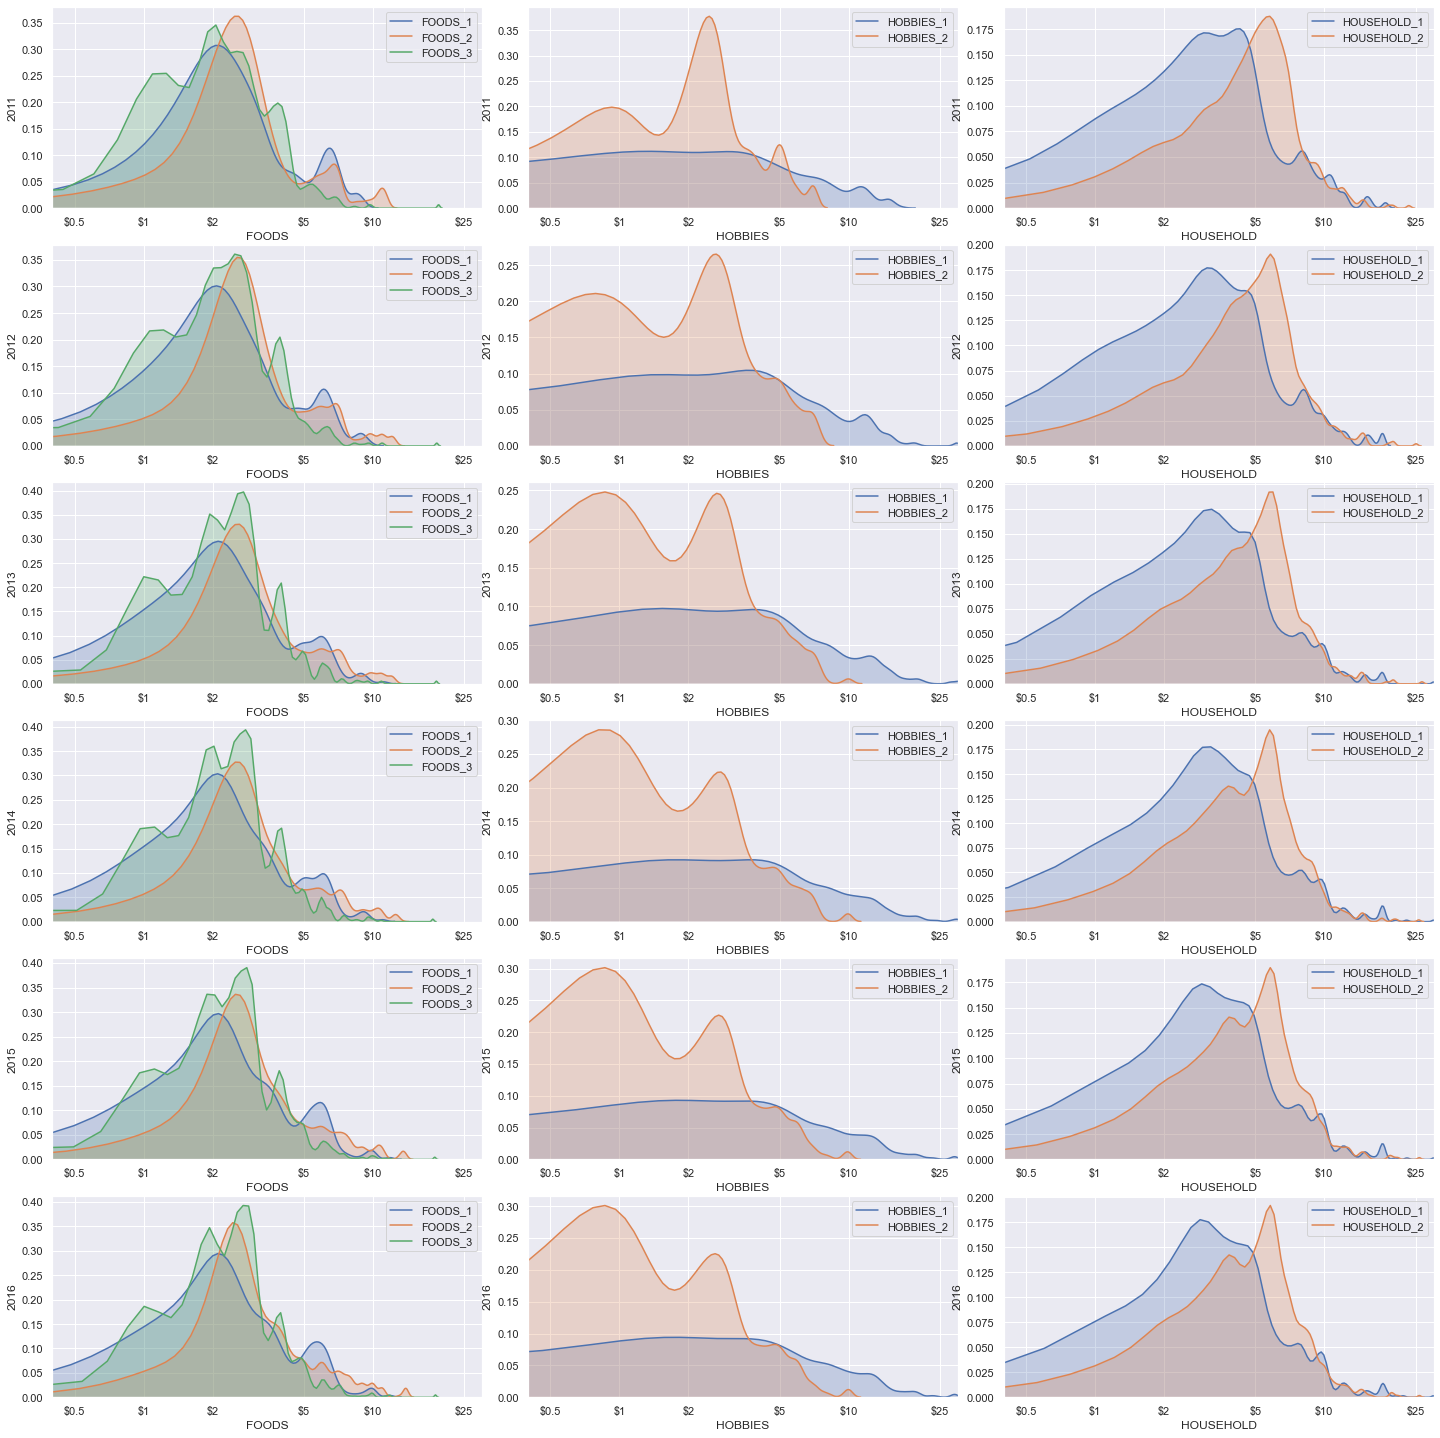

In [153]:
import matplotlib
catgs = ["FOODS","HOBBIES","HOUSEHOLD"]
fig , axes = plt.subplots(6,3,figsize=(20,20))
fig.tight_layout()

for y,year in enumerate(cat_year_price["year"].unique().tolist()):
    for i,cat in enumerate(catgs):
        ax = axes[y%6][i]
        cat_price = cat_year_price[(cat_year_price["cat_id"]==cat)&(price_dept["year"]==year)]
        for dept in cat_price["dept_id"].unique().tolist():
            plt.setp(ax, xlabel=cat)
            plt.setp(ax, ylabel=year)
            ax.set_xscale('log', base=10)
            ax.set_xlim(0.4,30)
            ax.set_xticks([0.5,1,2,5,10,25])  
            ax.set_xticklabels(["$0.5","$1","$2","$5","$10","$25"])
            sns.kdeplot(cat_price[cat_price["dept_id"]==dept]["sell_price"],
                        ax=ax,shade=True,label=dept,legend=True)

